In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('monthly_activity.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype
---  ------                   --------------    -----
 0   user_id                  1500000 non-null  int64
 1   active_days              1500000 non-null  int64
 2   messages_sent            1500000 non-null  int64
 3   messages_received        1500000 non-null  int64
 4   transactional_received   1500000 non-null  int64
 5   has_used_my_notes_ever   1500000 non-null  int64
 6   my_notes_days            1500000 non-null  int64
 7   my_notes_messages        1500000 non-null  int64
 8   has_used_reminders_ever  1500000 non-null  int64
 9   reminders_days           1500000 non-null  int64
 10  reminders_messages       1500000 non-null  int64
dtypes: int64(11)
memory usage: 125.9 MB
None
            user_id   active_days  messages_sent  messages_received  \
count  1.500000e+06  1.500000e+06   1.500000e+06       1.500000e+06 

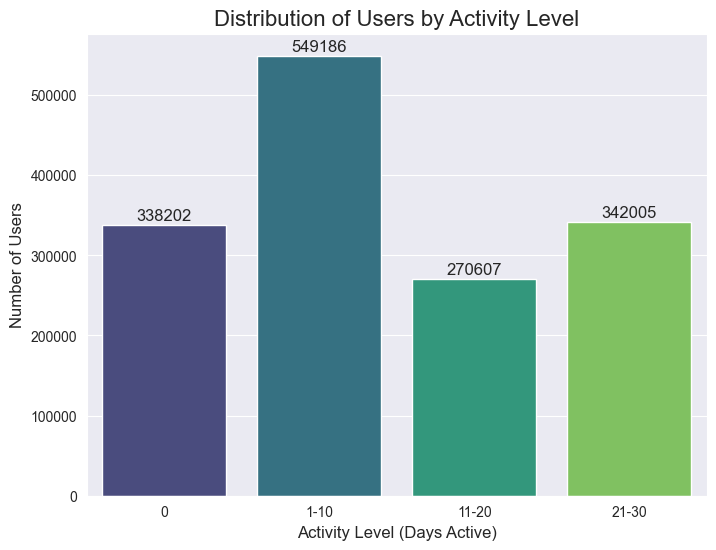

In [3]:
# Segment Users by Activity Levels
activity_levels = ['None', 'Low', 'Medium', 'High']
df['activity_segment'] = pd.cut(
    df['active_days'], bins=[-1, 0, 10, 20, 30], labels=activity_levels
)

activity_counts = df['activity_segment'].value_counts().sort_index()

activity_counts = df['activity_segment'].value_counts().sort_index()
activity_bins = ['0', '1-10', '11-20', '21-30']

plt.figure(figsize=(8, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')

plt.title('Distribution of Users by Activity Level', fontsize=16)
plt.xlabel('Activity Level (Days Active)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

for i, count in enumerate(activity_counts.values):
    plt.text(i, count + (max(activity_counts.values) * 0.01), str(count), ha='center', fontsize=12)

plt.xticks(ticks=range(len(activity_counts.index)), labels=activity_bins)
plt.show()

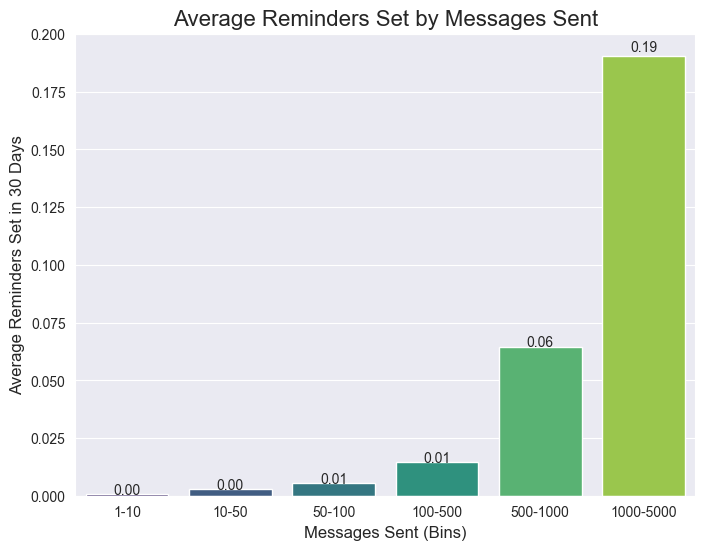

In [4]:
# Distribution of Reminders Usage by Messages Sent
df['messages_sent_bin'] = pd.cut(df['messages_sent'],
                                 bins=[0, 10, 50, 100, 500, 1000, 5000],
                                 labels=['1-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000'])

reminders_mean = df.groupby('messages_sent_bin')['reminders_messages'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=reminders_mean.index, y=reminders_mean.values, palette='viridis')

plt.title('Average Reminders Set by Messages Sent', fontsize=16)
plt.xlabel('Messages Sent (Bins)', fontsize=12)
plt.ylabel('Average Reminders Set in 30 Days', fontsize=12)

for i, value in enumerate(reminders_mean.values):
        plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=10)

plt.show()

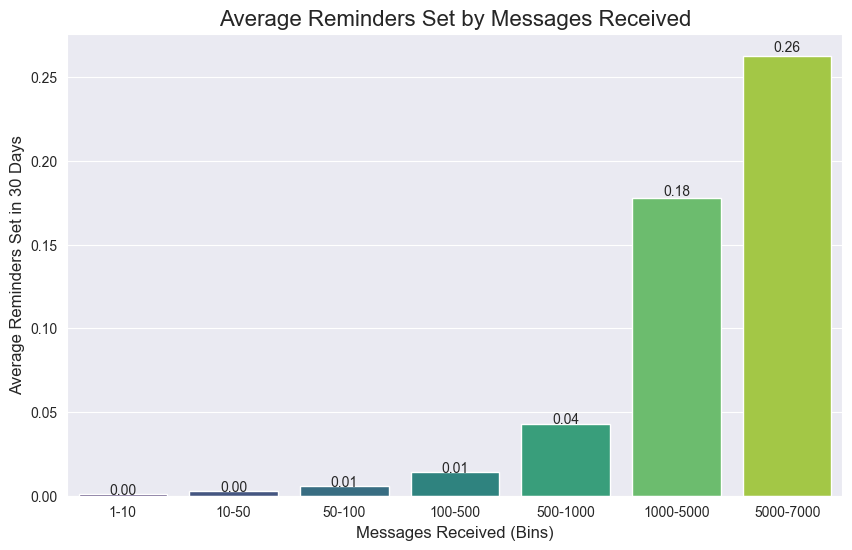

In [5]:
# Distribution of Reminders Usage by Messages Received
df['messages_received_bin'] = pd.cut(df['messages_received'],
                                    bins=[0, 10, 50, 100, 500, 1000, 5000, 7000],
                                    labels=['1-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-7000'])

reminders_mean_received = df.groupby('messages_received_bin')['reminders_messages'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=reminders_mean_received.index, y=reminders_mean_received.values, palette='viridis')

plt.title('Average Reminders Set by Messages Received', fontsize=16)
plt.xlabel('Messages Received (Bins)', fontsize=12)
plt.ylabel('Average Reminders Set in 30 Days', fontsize=12)

for i, value in enumerate(reminders_mean_received.values):
    plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=10)

plt.show()

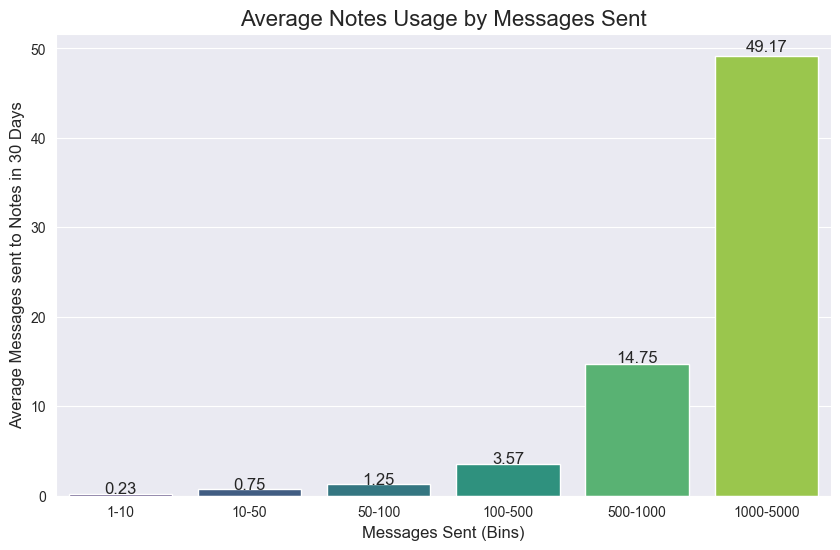

In [6]:
# Distribution of My Notes Usage by Messages Sent
df['messages_sent_bin'] = pd.cut(df['messages_sent'],
                                     bins=[0, 10, 50, 100, 500, 1000, 5000],
                                     labels=['1-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000'])

notes_mean = df.groupby('messages_sent_bin')['my_notes_messages'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=notes_mean.index, y=notes_mean.values, palette='viridis')

plt.title('Average Notes Usage by Messages Sent', fontsize=16)
plt.xlabel('Messages Sent (Bins)', fontsize=12)
plt.ylabel('Average Messages sent to Notes in 30 Days', fontsize=12)

for i, value in enumerate(notes_mean.values):
    plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=12)

plt.show()

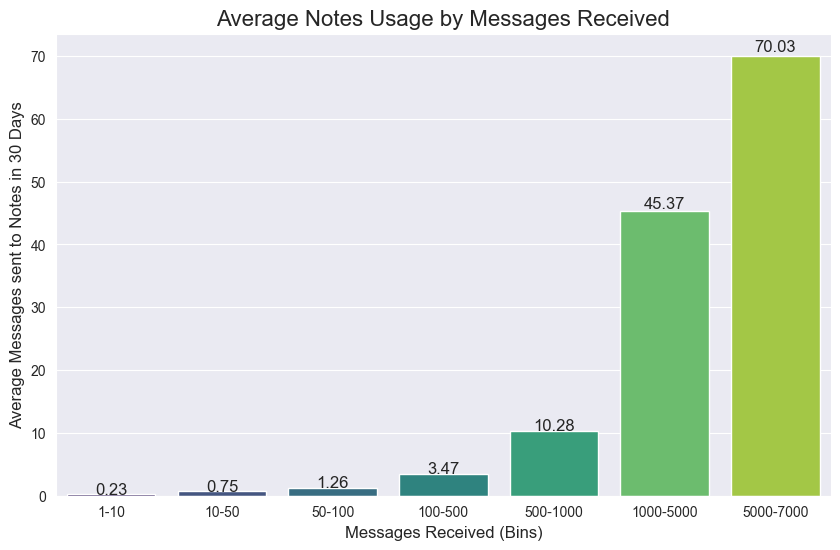

In [7]:
# Distribution of My Notes Usage by Messages Received
df['messages_received_bin'] = pd.cut(df['messages_received'],
                                         bins=[0, 10, 50, 100, 500, 1000, 5000, 7000],
                                         labels=['1-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-7000'])

notes_mean = df.groupby('messages_received_bin')['my_notes_messages'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=notes_mean.index, y=notes_mean.values, palette='viridis')

plt.title('Average Notes Usage by Messages Received', fontsize=16)
plt.xlabel('Messages Received (Bins)', fontsize=12)
plt.ylabel('Average Messages sent to Notes in 30 Days', fontsize=12)

for i, value in enumerate(notes_mean.values):
    plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=12)

plt.show()

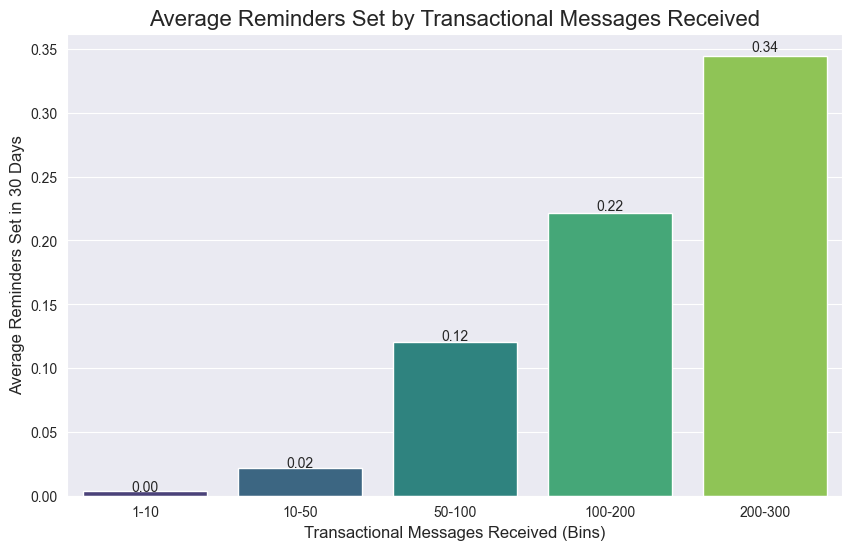

In [8]:
# Distribution of Reminders Usage by Transactional Messages Received
df['transactional_received_bin'] = pd.cut(df['transactional_received'],
                                              bins=[0, 10, 50, 100, 200, 300],
                                              labels=['1-10', '10-50', '50-100', '100-200', '200-300'])

reminders_mean_transactional = df.groupby('transactional_received_bin')['reminders_messages'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=reminders_mean_transactional.index, y=reminders_mean_transactional.values, palette='viridis')

plt.title('Average Reminders Set by Transactional Messages Received', fontsize=16)
plt.xlabel('Transactional Messages Received (Bins)', fontsize=12)
plt.ylabel('Average Reminders Set in 30 Days', fontsize=12)
for i, value in enumerate(reminders_mean_transactional.values):
    plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=10)

plt.show()

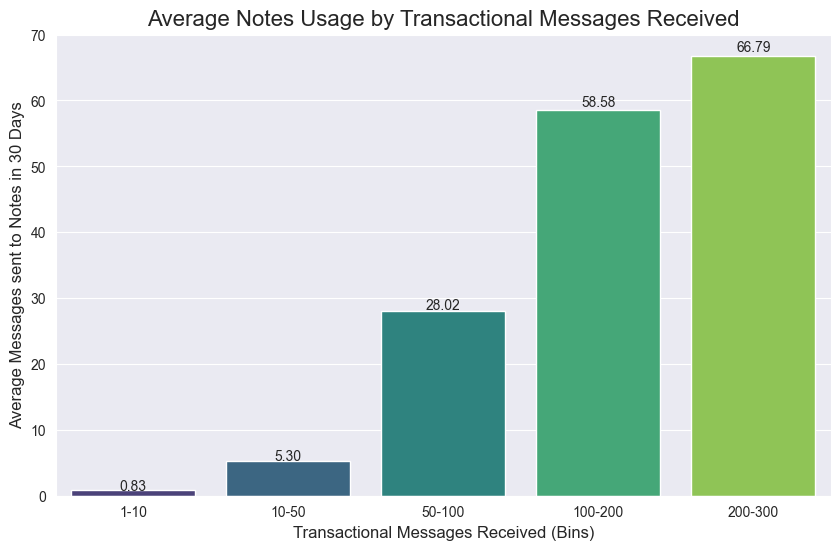

In [9]:
# Distribution of My Notes Usage by Transactional Messages Received
df['transactional_received_bin'] = pd.cut(df['transactional_received'],
                                              bins=[0, 10, 50, 100, 200, 300],
                                              labels=['1-10', '10-50', '50-100', '100-200', '200-300'])

reminders_mean_transactional = df.groupby('transactional_received_bin')['my_notes_messages'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=reminders_mean_transactional.index, y=reminders_mean_transactional.values, palette='viridis')

plt.title('Average Notes Usage by Transactional Messages Received', fontsize=16)
plt.xlabel('Transactional Messages Received (Bins)', fontsize=12)
plt.ylabel('Average Messages sent to Notes in 30 Days', fontsize=12)
for i, value in enumerate(reminders_mean_transactional.values):
    plt.text(i, value + (value * 0.01), f'{value:.2f}', ha='center', fontsize=10)

plt.show()

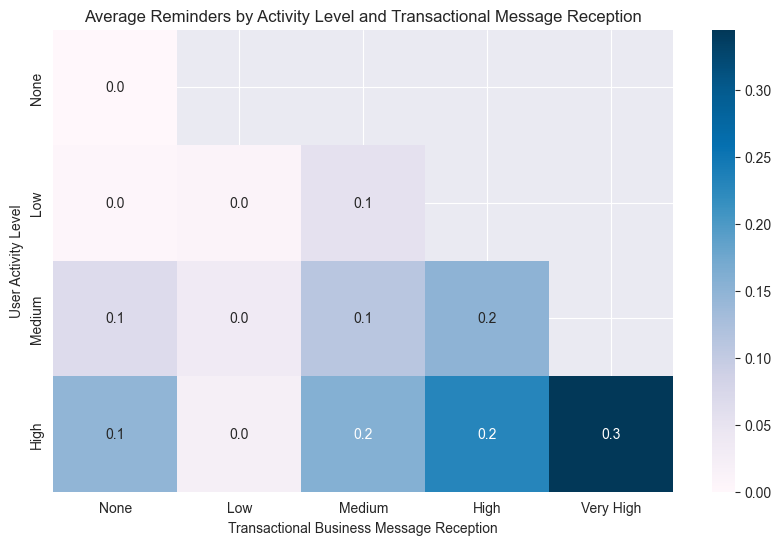

In [10]:
# Heatmap of Feature Usage by Activity Levels and Business Message Reception
df['transactional_bin'] = pd.cut(
    df['transactional_received'], bins=[-1, 0, 50, 100, 200, 300], labels=['None', 'Low', 'Medium', 'High', 'Very High']
)

# Pivot table to create the heatmap
heatmap_data = pd.pivot_table(
    df, values='reminders_messages', index='activity_segment', columns='transactional_bin', aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='PuBu')
plt.title('Average Reminders by Activity Level and Transactional Message Reception')
plt.xlabel('Transactional Business Message Reception')
plt.ylabel('User Activity Level')
plt.show()

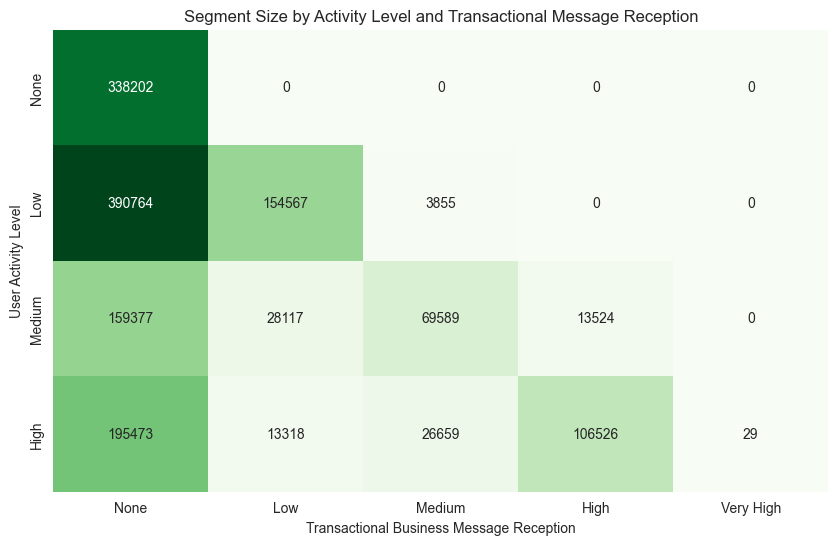

In [11]:
df['transactional_bin'] = pd.cut(
    df['transactional_received'], bins=[-1, 0, 50, 100, 200, 300], labels=['None', 'Low', 'Medium', 'High', 'Very High']
)

# Pivot table to calculate the segment size (number of users in each combination)
segment_size = pd.pivot_table(
    df, values='user_id', index='activity_segment', columns='transactional_bin', aggfunc='count'
)

plt.figure(figsize=(10, 6))
sns.heatmap(segment_size, annot=True, fmt="d", cmap='Greens', cbar=False)

plt.title('Segment Size by Activity Level and Transactional Message Reception')
plt.xlabel('Transactional Business Message Reception')
plt.ylabel('User Activity Level')

plt.show()

In [12]:
active_users = df[df['active_days'] > 0]

# Users with high share of transactional messages
high_transaction_users = active_users[active_users['transactional_received'] > active_users['messages_received'] * 0.5]

# Users actively engaged in My Notes or Reminders
engaged_users = active_users[(active_users['my_notes_days'] > 0) | (active_users['reminders_days'] > 0)]

# Calculate the shares
total_active_users = len(active_users)
high_transaction_share = len(high_transaction_users) / total_active_users * 100
engaged_users_share = len(engaged_users) / total_active_users * 100

print(f"Number of high transactional message users: {len(high_transaction_users)} ({high_transaction_share:.2f}% of active users)")
print(f"Number of engaged users (My Notes or Reminders): {len(engaged_users)} ({engaged_users_share:.2f}% of active users)")

Number of high transactional message users: 15511 (1.34% of active users)
Number of engaged users (My Notes or Reminders): 277022 (23.84% of active users)
